# Import relevant libraries

In [2]:
import matplotlib.pyplot as plt   
import seaborn as sns; sns.set()  
import numpy as np  
import pandas as pd 
from sklearn.cluster import KMeans 
from datetime import datetime, timedelta

## Reading function

In [3]:
def read_data(city_name):
    trip_data = pd.read_csv("Project_Data/Combined_Data/"+city_name+".csv", encoding = "ISO-8859-1")
    trip_data["trip_duration"] = pd.to_timedelta(trip_data["trip_duration"])
    trip_data["datetime_start"] = pd.to_datetime(trip_data["datetime_start"])
    trip_data["datetime_end"] = pd.to_datetime(trip_data["datetime_end"])
    trip_data["time"] = pd.to_datetime(trip_data["time"])
    trip_data["day"] = pd.to_datetime(trip_data["day"])
    return trip_data

In [4]:
dataBr = read_data("Bremen")
dataDu = read_data("Duesseldorf")

In [5]:
city1 = "Bremen"
city2 = "Duesseldorf"
start_date = "2019-02-01 00:00:00"
end_date = "2019-06-30 23:59:00"
startDate = datetime.fromisoformat(start_date)
endDate = datetime.fromisoformat(end_date)

In [6]:
dataBr.head(10)

,Unnamed: 0,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,...,fleetsize_weekly,fleetsize_dayly,fleetsize_monthly,distance,trip_duration_hours,avg_speed,rounded_time_hourly,temp,wind,rain
0,0,2019-04-21,2021-01-22 17:34:00,20507,bremen,00:13:00,53.078923,8.884911,53.078711,8.899906,...,331,163,395,1.001900,0.216667,4.624155,2019-04-21 18:00:00,20.4,2.0,0.0
1,1,2019-05-23,2021-01-22 15:33:00,20507,bremen,00:07:00,53.078923,8.884911,53.078004,8.876828,...,310,172,373,0.549476,0.116667,4.709793,2019-05-23 16:00:00,20.7,2.4,0.0
2,2,2019-06-14,2021-01-22 22:30:00,20507,bremen,00:08:00,53.078923,8.884911,53.074731,8.876003,...,304,204,342,0.755886,0.133333,5.669146,2019-06-14 22:00:00,19.6,4.4,0.0
3,3,2019-06-16,2021-01-22 10:00:00,20507,bremen,02:02:00,53.074731,8.876003,53.078923,8.884911,...,304,184,342,0.755886,2.033333,0.371747,2019-06-16 10:00:00,21.6,3.0,0.0
4,4,2019-06-16,2021-01-22 12:55:00,20507,bremen,02:23:00,53.078923,8.884911,53.076236,8.891322,...,304,184,342,0.522213,2.383333,0.219110,2019-06-16 13:00:00,21.8,4.4,0.0
5,5,2019-06-28,2021-01-22 13:07:00,20507,bremen,00:49:00,53.078923,8.884911,53.073298,8.794316,...,284,166,342,6.084054,0.816667,7.449862,2019-06-28 13:00:00,21.5,3.2,0.0
6,6,2019-06-28,2021-01-22 15:01:00,20507,bremen,00:49:00,53.073529,8.794269,53.077716,8.897971,...,284,166,342,6.943062,0.816667,8.501708,2019-06-28 15:00:00,22.1,4.3,0.0
7,7,2019-02-24,2021-01-22 09:44:00,20508,bremen,00:22:00,53.158160,8.945250,53.127139,8.898528,...,267,116,338,4.648571,0.366667,12.677921,2019-02-24 10:00:00,6.6,1.2,0.0
8,8,2019-02-24,2021-01-22 13:20:00,20508,bremen,01:11:00,53.127139,8.898528,53.113707,9.077220,...,267,116,338,12.017662,1.183333,10.155771,2019-02-24 13:00:00,13.1,1.1,0.0
9,9,2019-02-24,2021-01-22 15:28:00,20508,bremen,01:32:00,53.113711,9.077380,53.081751,8.810349,...,267,116,338,18.179632,1.533333,11.856281,2019-02-24 15:00:00,14.2,1.2,0.0


In [7]:
# coordinates of city center as [lat, lng]
br_center = [53.078893247451994, 8.8027747491885]
du_center = [51.226815497281706, 6.773786392066722]

In [8]:
from haversine import haversine, Unit

dataBr["distance_from_center_start"] = dataBr.apply(lambda row: haversine((row["orig_lat"], row["orig_lng"]),(br_center[0], br_center[1]),Unit.KILOMETERS), axis=1) 
dataBr["distance_from_center_end"] = dataBr.apply(lambda row: haversine((row["dest_lat"], row["dest_lng"]),(br_center[0], br_center[1]),Unit.KILOMETERS), axis=1) 
dataDu["distance_from_center_start"] = dataDu.apply(lambda row: haversine((row["orig_lat"], row["orig_lng"]),(du_center[0], du_center[1]),Unit.KILOMETERS), axis=1) 
dataDu["distance_from_center_end"] = dataDu.apply(lambda row: haversine((row["dest_lat"], row["dest_lng"]),(du_center[0], du_center[1]),Unit.KILOMETERS), axis=1) 

## Data for Clustering

In [9]:
# set time window for the given data
dat_time_framed_br = dataBr.loc[(dataBr["datetime_start"] > startDate) & (dataBr["datetime_start"] <= endDate)]
dat_time_framed_du = dataDu.loc[(dataDu["datetime_start"] > startDate) & (dataDu["datetime_start"] <= endDate)]

In [10]:
dat_time_framed_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57894 entries, 0 to 57893
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Unnamed: 0                  57894 non-null  int64          
 1   day                         57894 non-null  datetime64[ns] 
 2   time                        57894 non-null  datetime64[ns] 
 3   b_number                    57894 non-null  int64          
 4   city                        57894 non-null  object         
 5   trip_duration               57894 non-null  timedelta64[ns]
 6   orig_lat                    57894 non-null  float64        
 7   orig_lng                    57894 non-null  float64        
 8   dest_lat                    57894 non-null  float64        
 9   dest_lng                    57894 non-null  float64        
 10  datetime_start              57894 non-null  datetime64[ns] 
 11  datetime_end                57894 non-nul

### Dropping redundant/unnecessary features and normalizing

With the clustering approach we want to find hidden relationships in the data set, that we might or might not have seen or hypothesized about beforehand.

Obviously, if we throw in the whole data set to be clustered, there could be some strong correlations internal to the data which are overshadowing other, true (hidden) relation ships.

For this purpose, some redundant columns that might overlap and some that are unspecific to the data (e.g. fleetsize) are dropped to maintain a better clustering quality.

#### Drop columns

In [54]:
X = dat_time_framed_br.drop(["Unnamed: 0","b_number","day","time","trip_duration","city","fleetsize_weekly","fleetsize_dayly","fleetsize_monthly","weekday","month","week","rounded_time_hourly"], axis=1);
Y = dat_time_framed_du.drop(["Unnamed: 0","b_number","day","time","trip_duration","city","fleetsize_weekly","fleetsize_dayly","fleetsize_monthly","weekday","month","week","rounded_time_hourly"], axis=1);

In [55]:
X.head(10)

,orig_lat,orig_lng,dest_lat,dest_lng,datetime_start,datetime_end,hour,distance,trip_duration_hours,avg_speed,temp,wind,rain,distance_from_center_start,distance_from_center_end
0,53.078923,8.884911,53.078711,8.899906,2019-04-21 17:34:00,2019-04-21 17:47:00,17,1.001900,0.216667,4.624155,20.4,2.0,0.0,5.486415,6.488083
1,53.078923,8.884911,53.078004,8.876828,2019-05-23 15:33:00,2019-05-23 15:40:00,15,0.549476,0.116667,4.709793,20.7,2.4,0.0,5.486415,4.947560
2,53.078923,8.884911,53.074731,8.876003,2019-06-14 22:30:00,2019-06-14 22:38:00,22,0.755886,0.133333,5.669146,19.6,4.4,0.0,5.486415,4.913475
3,53.074731,8.876003,53.078923,8.884911,2019-06-16 10:00:00,2019-06-16 12:02:00,10,0.755886,2.033333,0.371747,21.6,3.0,0.0,4.913475,5.486415
4,53.078923,8.884911,53.076236,8.891322,2019-06-16 12:55:00,2019-06-16 15:18:00,12,0.522213,2.383333,0.219110,21.8,4.4,0.0,5.486415,5.922224
5,53.078923,8.884911,53.073298,8.794316,2019-06-28 13:07:00,2019-06-28 13:56:00,13,6.084054,0.816667,7.449862,21.5,3.2,0.0,5.486415,0.840472
6,53.073529,8.794269,53.077716,8.897971,2019-06-28 15:01:00,2019-06-28 15:50:00,15,6.943062,0.816667,8.501708,22.1,4.3,0.0,0.823776,6.360221
7,53.158160,8.945250,53.127139,8.898528,2019-02-24 09:44:00,2019-02-24 10:06:00,9,4.648571,0.366667,12.677921,6.6,1.2,0.0,12.965011,8.345218
8,53.127139,8.898528,53.113707,9.077220,2019-02-24 13:20:00,2019-02-24 14:31:00,13,12.017662,1.183333,10.155771,13.1,1.1,0.0,8.345218,18.728986
9,53.113711,9.077380,53.081751,8.810349,2019-02-24 15:28:00,2019-02-24 17:00:00,15,18.179632,1.533333,11.856281,14.2,1.2,0.0,18.739540,0.597467


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57894 entries, 0 to 57893
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   orig_lat                    57894 non-null  float64       
 1   orig_lng                    57894 non-null  float64       
 2   dest_lat                    57894 non-null  float64       
 3   dest_lng                    57894 non-null  float64       
 4   datetime_start              57894 non-null  datetime64[ns]
 5   datetime_end                57894 non-null  datetime64[ns]
 6   hour                        57894 non-null  int64         
 7   distance                    57894 non-null  float64       
 8   trip_duration_hours         57894 non-null  float64       
 9   avg_speed                   57894 non-null  float64       
 10  temp                        57894 non-null  float64       
 11  wind                        57894 non-null  float64   

#### Convert to numeric types

In [57]:
# convert dates to seconds
X["datetime_start"] = pd.to_numeric(X["datetime_start"])
X["datetime_end"] = pd.to_numeric(X["datetime_end"])

Y["datetime_start"] = pd.to_numeric(Y["datetime_start"])
Y["datetime_end"] = pd.to_numeric(Y["datetime_end"])

In [60]:
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57894 entries, 0 to 57893
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   orig_lat                    57894 non-null  float64
 1   orig_lng                    57894 non-null  float64
 2   dest_lat                    57894 non-null  float64
 3   dest_lng                    57894 non-null  float64
 4   datetime_start              57894 non-null  int64  
 5   datetime_end                57894 non-null  int64  
 6   hour                        57894 non-null  int64  
 7   distance                    57894 non-null  float64
 8   trip_duration_hours         57894 non-null  float64
 9   avg_speed                   57894 non-null  float64
 10  temp                        57894 non-null  float64
 11  wind                        57894 non-null  float64
 12  rain                        57894 non-null  float64
 13  distance_from_center_start  578

#### Normalize

In [68]:
from sklearn.preprocessing import StandardScaler

def norm(df):
    scaler = StandardScaler()
    scaler.fit(df)
    df_scaled = scaler.transform(df)

    # create a df out of array
    df_scaled_df = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
    return df_scaled, df_scaled_df
    

X_scaled, X_scaled_df = norm(X)
Y_scaled, Y_scaled_df = norm(Y)

X_scaled_df.head()

,orig_lat,orig_lng,dest_lat,dest_lng,datetime_start,datetime_end,hour,distance,trip_duration_hours,avg_speed,temp,wind,rain,distance_from_center_start,distance_from_center_end
0,0.052755,2.309151,0.040096,2.753492,-0.220670,-0.220780,0.770594,-0.512654,-0.275384,-0.645520,0.904379,-1.211424,-0.140957,1.793378,2.256311
1,0.052755,2.309151,-0.003631,1.971327,0.552909,0.552681,0.389097,-0.839654,-0.517670,-0.621686,0.947427,-1.023798,-0.140957,1.793378,1.460179
2,0.052755,2.309151,-0.206180,1.943354,1.093163,1.092942,1.724334,-0.690467,-0.477289,-0.354698,0.789584,-0.085668,-0.140957,1.793378,1.442564
3,-0.210255,2.000564,0.053206,2.245269,1.129015,1.130712,-0.564643,-0.690467,4.126139,-1.828968,1.076571,-0.742359,-0.140957,1.491707,1.738655
4,0.052755,2.309151,-0.113083,2.462562,1.131961,1.134011,-0.183147,-0.859359,4.974139,-1.871447,1.105270,-0.085668,-0.140957,1.793378,1.963879


## Create some plots to get an intuition of what clusters might be found

#### Bremen

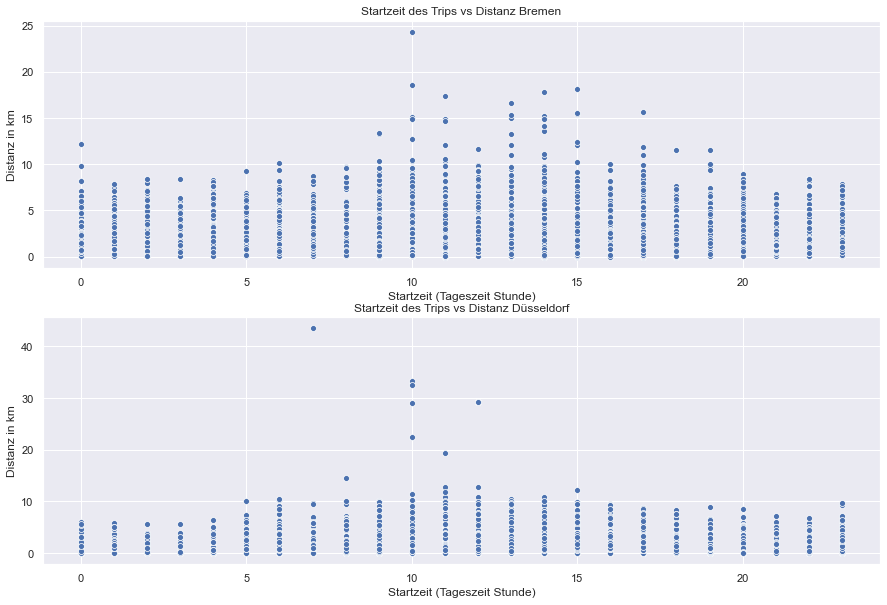

In [69]:
# create figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

sns.scatterplot(ax = ax1, data=X, x="hour", y="distance", ci=None);  
ax1.set_title('Startzeit des Trips vs Distanz Bremen')  
ax1.set_xlabel('Startzeit (Tageszeit Stunde)');
ax1.set_ylabel('Distanz in km');

sns.scatterplot(ax = ax2, data=Y, x="hour", y="distance", ci=None);  
ax2.set_title('Startzeit des Trips vs Distanz Düsseldorf')  
ax2.set_xlabel('Startzeit (Tageszeit Stunde)');
ax2.set_ylabel('Distanz in km');

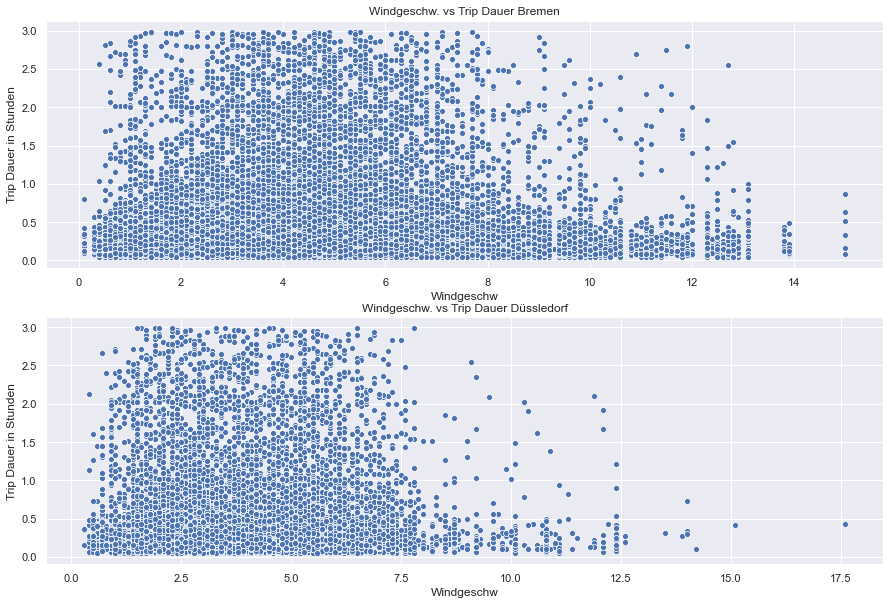

In [70]:
# create figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

sns.scatterplot(ax = ax1, data=X, x="wind", y="trip_duration_hours", ci=None);  
ax1.set_title('Windgeschw. vs Trip Dauer Bremen')  
ax1.set_xlabel('Windgeschw');
ax1.set_ylabel('Trip Dauer in Stunden');

sns.scatterplot(ax = ax2, data=Y, x="wind", y="trip_duration_hours", ci=None);  
ax2.set_title('Windgeschw. vs Trip Dauer Düssledorf')  
ax2.set_xlabel('Windgeschw');
ax2.set_ylabel('Trip Dauer in Stunden');

## Clustering 

In [71]:
X_scaled_df.head()

,orig_lat,orig_lng,dest_lat,dest_lng,datetime_start,datetime_end,hour,distance,trip_duration_hours,avg_speed,temp,wind,rain,distance_from_center_start,distance_from_center_end
0,0.052755,2.309151,0.040096,2.753492,-0.220670,-0.220780,0.770594,-0.512654,-0.275384,-0.645520,0.904379,-1.211424,-0.140957,1.793378,2.256311
1,0.052755,2.309151,-0.003631,1.971327,0.552909,0.552681,0.389097,-0.839654,-0.517670,-0.621686,0.947427,-1.023798,-0.140957,1.793378,1.460179
2,0.052755,2.309151,-0.206180,1.943354,1.093163,1.092942,1.724334,-0.690467,-0.477289,-0.354698,0.789584,-0.085668,-0.140957,1.793378,1.442564
3,-0.210255,2.000564,0.053206,2.245269,1.129015,1.130712,-0.564643,-0.690467,4.126139,-1.828968,1.076571,-0.742359,-0.140957,1.491707,1.738655
4,0.052755,2.309151,-0.113083,2.462562,1.131961,1.134011,-0.183147,-0.859359,4.974139,-1.871447,1.105270,-0.085668,-0.140957,1.793378,1.963879


### Find optimal k value

In [72]:
def find_k(scaled_values):
    k_max = 10

    clusters = []
    losses = []

    for k in range(k_max):
        model = KMeans(n_clusters=k+1)
        model.fit(X_scaled)
        clusters.append(k+1)
        losses.append(model.inertia_)
    
    return clusters, losses

clustersBr, lossesBr = find_k(X_scaled)
clustersDu, lossesDu = find_k(Y_scaled)

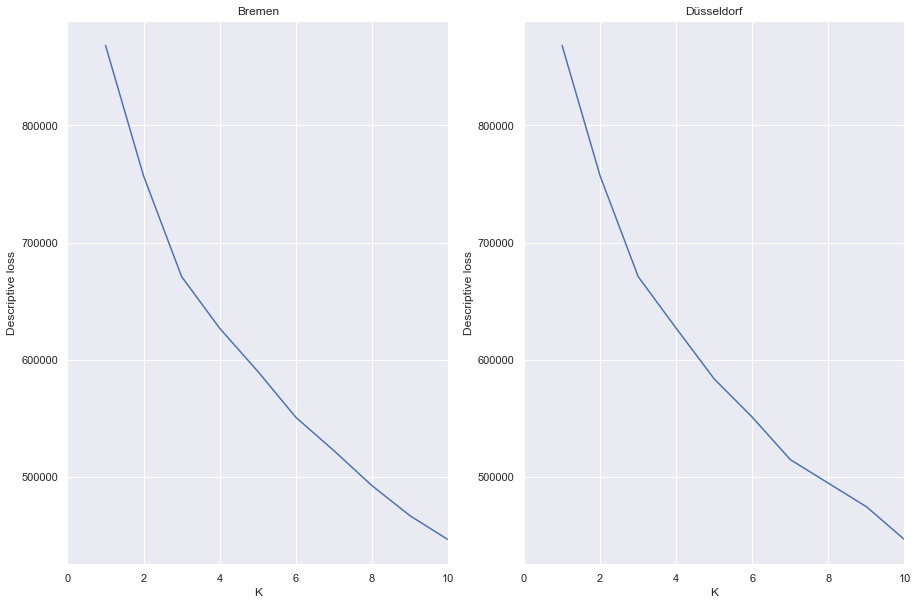

In [79]:
def plot_losses(lim):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    ax1.plot(clustersBr, lossesBr)
    ax2.plot(clustersDu, lossesDu)

    ax1.set_title("Bremen")
    ax1.set_ylabel("Descriptive loss")
    ax1.set_xlabel("K")
    ax1.set_xlim(lim)

    ax2.set_title("Düsseldorf")
    ax2.set_ylabel("Descriptive loss")
    ax2.set_xlabel("K")
    ax2.set_xlim(lim)
    plt.show()

plot_losses([0,10])

It seems as if a good value could be between 2 and 7

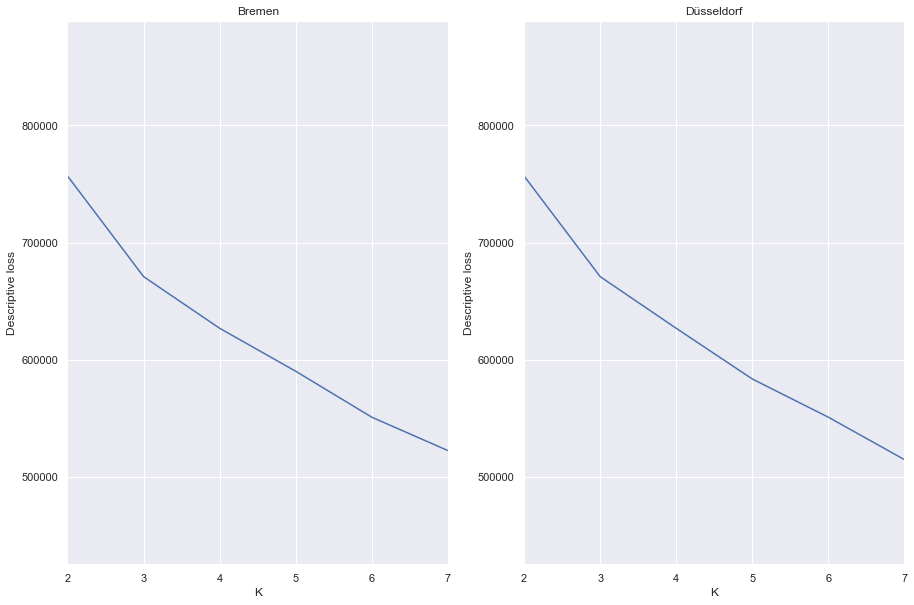

In [80]:
plot_losses([2,7])

--> select k=3 for both cities

### Generate clusters with k=3

In [81]:
kmeans = KMeans(n_clusters=3)
km_x = kmeans.fit_predict(X)
km_y = kmeans.fit_predict(Y)

#### Plot clusters

In [99]:
def plot_clusters_city(city, col1, col2):
    dat = X if city == "Bremen" else Y
    clus_label = km_x if city == "Bremen" else km_y
        
    plt.scatter(
       dat[clus_label==0][col1], dat[clus_label==0][col2],
        s=30, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
       dat[clus_label==1][col1], dat[clus_label==1][col2],
       s=30, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )


    plt.scatter(
       dat[clus_label==2][col1], dat[clus_label==2][col2],
        s=30, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )
    plt.title(city)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.show()

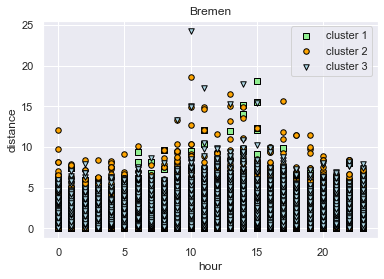

In [100]:
plot_clusters_city("Bremen", "hour", "distance")

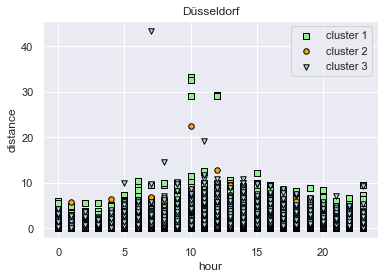

In [96]:
plot_clusters_city("Düsseldorf", "hour", "distance")

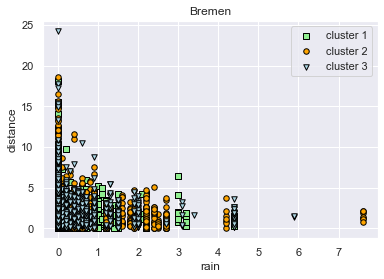

In [101]:
plot_clusters_city("Bremen", "rain", "distance")

--> cluster 2 contaisn more trips with heavier rain compared to the others

##### Might be, that cluster 2 contains those trips with customers who do not care about heavier rain

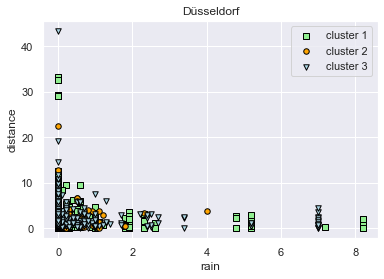

In [102]:
plot_clusters_city("Düsseldorf", "rain", "distance")

--> here we see that almost exclusicely trips from cluster 2 and 3 have higher rain values

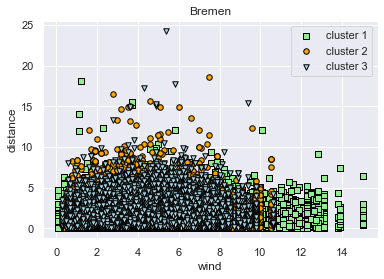

In [103]:
plot_clusters_city("Bremen", "wind", "distance")

--> Cluster 1 and 2 contain those trips with comparably higher driven distance
--> values from cluster 1 and 3 contain largely a similar maximum driven distance of about 6-7 kilometers
--> cluster 1 contains a wide spectrum of wind values, suggesting that these customers did not care about wind

##### Hypothesis: since cluster 1 contains those trips with customers who do not care about wind as much as rain but drive on average the same maximum distance, it could contain the commuting trips (assuming the impact of wind on the decision to drive with either the bike or the car is lower than the impact of rain)

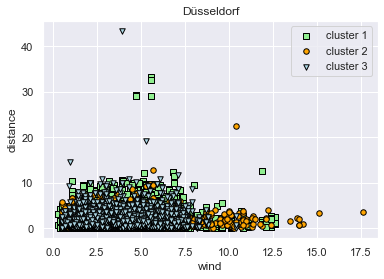

In [104]:
plot_clusters_city("Düsseldorf", "wind", "distance")

In [113]:
def plot_clusters_temps(city):
    dat = X if city == "Bremen" else Y
    clus_label = km_x if city == "Bremen" else km_y

    fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

    ax.scatter(
        dat[clus_label == 0]["temp"], dat[clus_label == 0]["trip_duration_hours"],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    ax.scatter(
        dat[clus_label == 1]["temp"], dat[clus_label == 1]["trip_duration_hours"],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )

    ax.scatter(
        dat[clus_label == 2]["temp"], dat[clus_label == 2]["trip_duration_hours"],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )

    plt.xlabel("Temperatur")
    plt.ylabel("Trip duration in Stunden")
    plt.legend(scatterpoints=1)
    print("Min 1, 2, 3: ", dat[clus_label == 0]["temp"].min(), dat[clus_label == 1]["temp"].min(), dat[clus_label == 2]["temp"].min())
    print("Max 1, 2, 3: ", dat[clus_label == 0]["temp"].max(), dat[clus_label == 1]["temp"].max(), dat[clus_label == 2]["temp"].max())

Min 1, 2, 3:  -3.2 2.8 -0.9
Max 1, 2, 3:  17.9 34.4 23.9


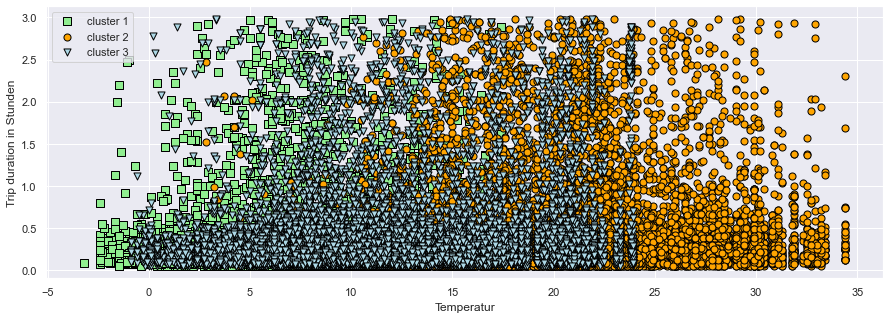

In [114]:
plot_clusters_temps("Bremen")

--> cluster 1 contains those trips below a temperature of about 18°C, cluster 3 up to a temperature of about 25°C and cluster 2 contains the trips at temperatures up to the maximum of 34°C

##### Even here, with temperatures up to about 18°C, the hypothesis that cluster 1 = commuters could be valid, since one might want to commute per bike when the temperatures are not too high (assuming the impact of lower temperatures on the decision to drive with either the bike or the car is lower than the impact of higher temperatures)

If one would argue that cluster 1 contains trips as free time activities, it would be questionable since the temperatures do not exceed 18°C which is unusual for bike trips in the free time

##### Since cluster 2 has higher min temperature as well as much higher max temperature, it could be hypothesized that these trips could be labeled as trips during the free time

Min 1, 2, 3:  6.8 -1.6 0.1
Max 1, 2, 3:  36.1 20.6 25.9


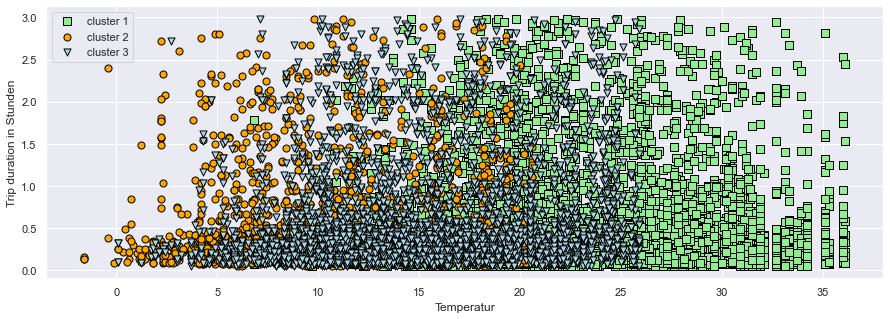

In [116]:
plot_clusters_temps("Düsseldorf")

##### here we see the same results as with bremen, but the cluster labels are mixed up. 
cluster 1(bremen) = cluster 2(düsseldorf)
cluster 2(bremen) = cluster 1(düsseldorf)

#### Showing the distances from city center at the start of the trip vs the end of the trip (ignoring all distances above 20km)

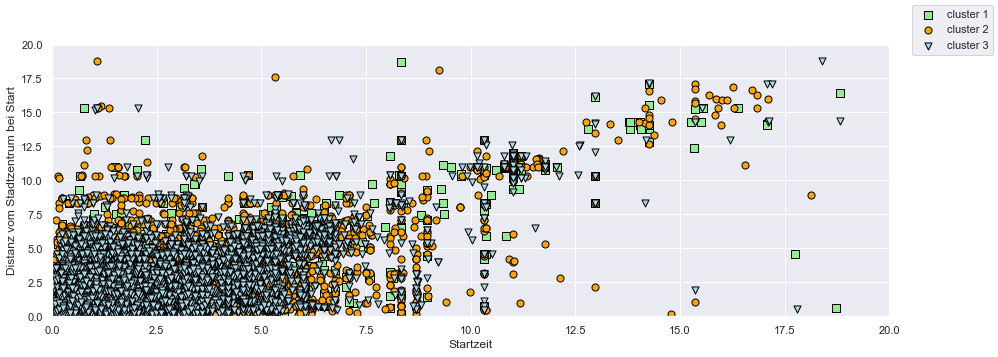

In [118]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

ax.scatter(
    X[km_x == 0]["distance_from_center_start"], X[km_x == 0]["distance_from_center_end"],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

ax.scatter(
    X[km_x == 1]["distance_from_center_start"], X[km_x == 1]["distance_from_center_end"],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

ax.scatter(
    X[km_x == 2]["distance_from_center_start"], X[km_x == 2]["distance_from_center_end"],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.xlabel("Startzeit")
plt.xlim(0,20)
plt.ylim(0,20)
plt.ylabel("Distanz vom Stadtzentrum bei Start")
fig.legend(scatterpoints=1)

--> Cluster 3 contains more inner city trips, while cluster 2 contains more outer city trips